In [2]:
using Multilane
using POMDPs
using POMDPToolbox
using MCTS
using Distributions # for Normal
using DataArrays
using DataFrames
using DataFramesMeta

#using Interact
using Interact
using Reactive
#using Records
using AutoViz
using AutomotiveDrivingModels
using JLD
using PyPlot
using HDF5
#using Cairo
#using Reel
#using GenerativeModels

In [3]:
sim = load("t3.jld","sim");

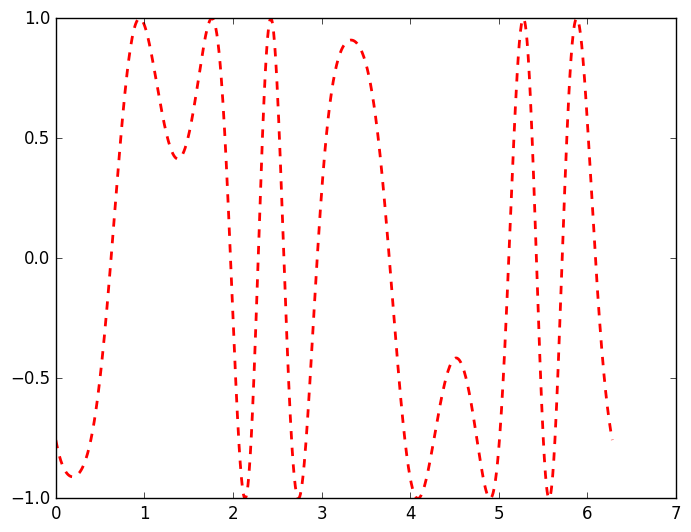

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff9bde34790>

In [3]:
x = linspace(0,2*pi,1000); y = sin.(3*x + 4*cos.(2*x))
plot(x, y, color="red", linewidth=2.0, linestyle="--")

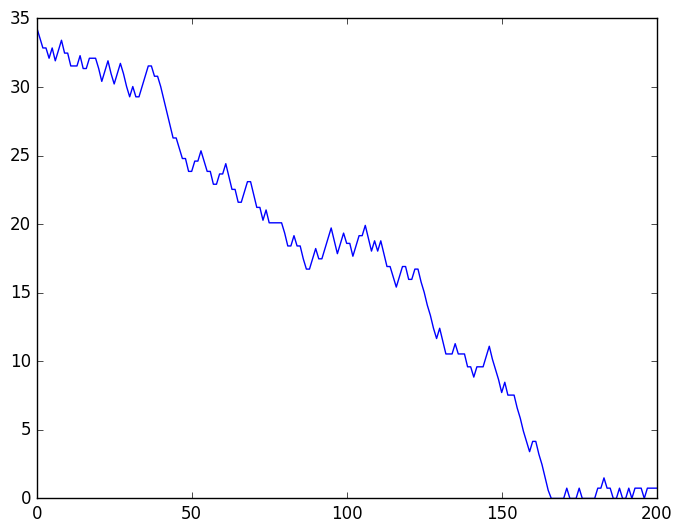

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8160175890>

In [4]:
state = deepcopy(sim.state_hist)
ego_vel = []
for i = 1:length(state)
    push!(ego_vel,state[i].cars[1].vel)
end
plot(ego_vel)

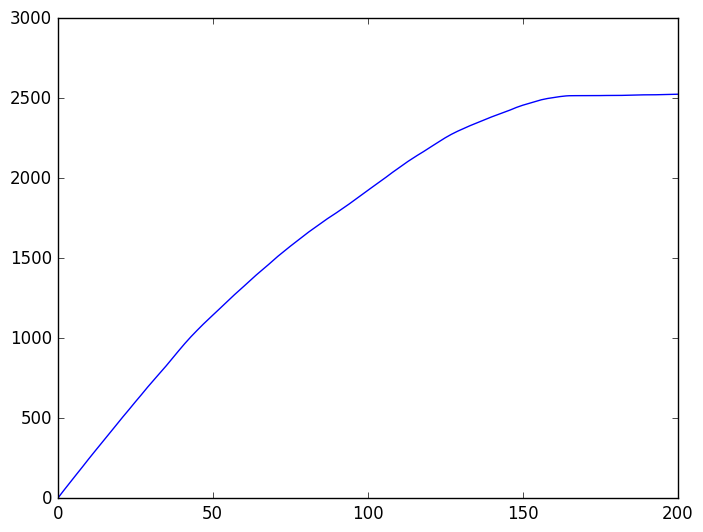

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f815ffb7610>

In [5]:
dt = 0.75
ego_x = []
push!(ego_x,0)
push!(ego_x,ego_vel[1]*dt)
for i = 2:(length(ego_vel)-1)
   push!(ego_x,ego_x[i]+ego_vel[i]*dt) 
end
plot(ego_x)

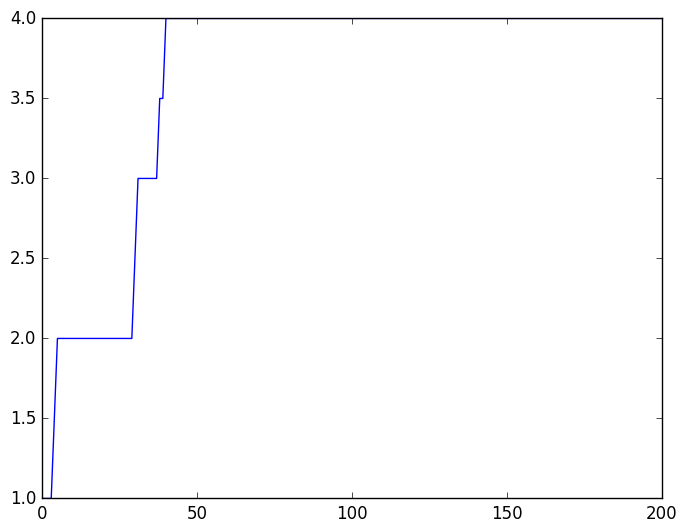

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f815fef3710>

In [6]:
ego_y = []
for i = 1:length(state)
    push!(ego_y,state[i].cars[1].y)
end
plot(ego_y)

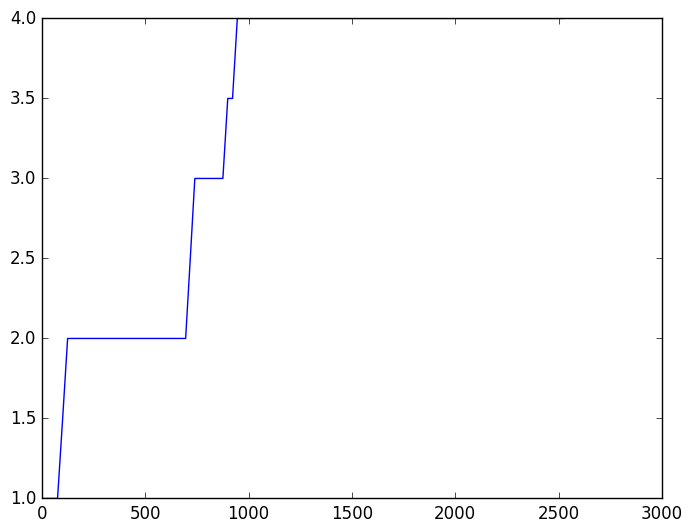

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff9bda03b90>

In [7]:
plot(ego_x,ego_y)

In [7]:
egox = Vector{Float64}(1:201)
egoy = Vector{Float64}(1:201);
egovel = Vector{Float64}(1:201);

In [8]:
for i = 1:201
    egox[i] = ego_x[i]
end
for i = 1:201
    egovel[i] = ego_vel[i]
end

In [9]:
for i = 1:201
    egoy[i] = ego_y[i]
end

In [10]:
egox

201-element Array{Float64,1}:
    0.0   
   25.7611
   50.9596
   75.5957
  100.232 
  124.305 
  148.941 
  172.874 
  197.37  
  222.428 
  246.783 
  271.137 
  294.789 
    ⋮     
 2522.46  
 2522.46  
 2522.46  
 2523.03  
 2523.03  
 2523.59  
 2524.15  
 2524.71  
 2524.71  
 2525.28  
 2525.84  
 2526.4   

In [11]:
egoy

201-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.5
 2.0
 2.0
 2.0
 2.0
 2.0
 2.0
 2.0
 2.0
 ⋮  
 4.0
 4.0
 4.0
 4.0
 4.0
 4.0
 4.0
 4.0
 4.0
 4.0
 4.0
 4.0

In [ ]:
egovel

In [36]:
h5open("test.h5", "w") do file
    write(file, "egox", egox)
    write(file, "egoy", egoy)
    write(file, "egovel", egovel)
end